In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Explorer

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5249,f,y,y,f,f,f,c,b,g,...,p,b,p,w,o,l,h,y,g,p
1,5781,x,s,p,t,n,f,c,b,e,...,e,w,p,w,t,e,w,c,w,e
2,7586,b,s,g,f,n,f,w,b,w,...,w,w,p,w,t,p,w,s,g,e
3,6181,f,s,n,f,s,f,c,n,b,...,p,w,p,w,o,e,w,v,d,p
4,7338,k,y,n,f,f,f,c,n,b,...,p,p,p,w,o,e,w,v,p,p


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                6499 non-null   int64 
 1   cap-shape                 6499 non-null   object
 2   cap-surface               6499 non-null   object
 3   cap-color                 6499 non-null   object
 4   bruises                   6499 non-null   object
 5   odor                      6499 non-null   object
 6   gill-attachment           6499 non-null   object
 7   gill-spacing              6499 non-null   object
 8   gill-size                 6499 non-null   object
 9   gill-color                6499 non-null   object
 10  stalk-shape               6499 non-null   object
 11  stalk-root                6499 non-null   object
 12  stalk-surface-above-ring  6499 non-null   object
 13  stalk-surface-below-ring  6499 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,Unnamed: 0
count,6499.000000
mean,4056.284198
std,2341.698691
min,0.000000
25%,2047.500000
50%,4078.000000
75%,6073.500000
max,8123.000000


In [6]:
df['veil-type'].unique()

array(['p'], dtype=object)

## Data Procesing

In [8]:
df = df.drop(columns=['veil-type'])

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = [
    "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
    "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root",
    "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-color", "ring-number", "ring-type",
    "spore-print-color", "population", "habitat", "class"
]

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                6499 non-null   int64
 1   cap-shape                 6499 non-null   int64
 2   cap-surface               6499 non-null   int64
 3   cap-color                 6499 non-null   int64
 4   bruises                   6499 non-null   int64
 5   odor                      6499 non-null   int64
 6   gill-attachment           6499 non-null   int64
 7   gill-spacing              6499 non-null   int64
 8   gill-size                 6499 non-null   int64
 9   gill-color                6499 non-null   int64
 10  stalk-shape               6499 non-null   int64
 11  stalk-root                6499 non-null   int64
 12  stalk-surface-above-ring  6499 non-null   int64
 13  stalk-surface-below-ring  6499 non-null   int64
 14  stalk-color-above-ring    6499 non-null 

In [11]:
df.head()

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5249,2,3,9,0,2,1,0,0,2,...,1,6,0,2,1,2,1,5,1,1
1,5781,5,2,5,1,5,1,0,0,1,...,2,2,7,2,2,0,7,1,6,0
2,7586,0,2,3,0,5,1,1,0,10,...,2,7,7,2,2,4,7,3,1,0
3,6181,2,2,4,0,7,1,0,1,0,...,1,6,7,2,1,0,7,4,0,1
4,7338,3,3,4,0,2,1,0,1,0,...,1,6,6,2,1,0,7,4,4,1


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df.drop(columns=['class'])
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

df_train= scaler.fit_transform(X_train)

df_test = scaler.transform(X_test)

X_train.shape, y_train.shape

((5199, 22), (5199,))

<Axes: >

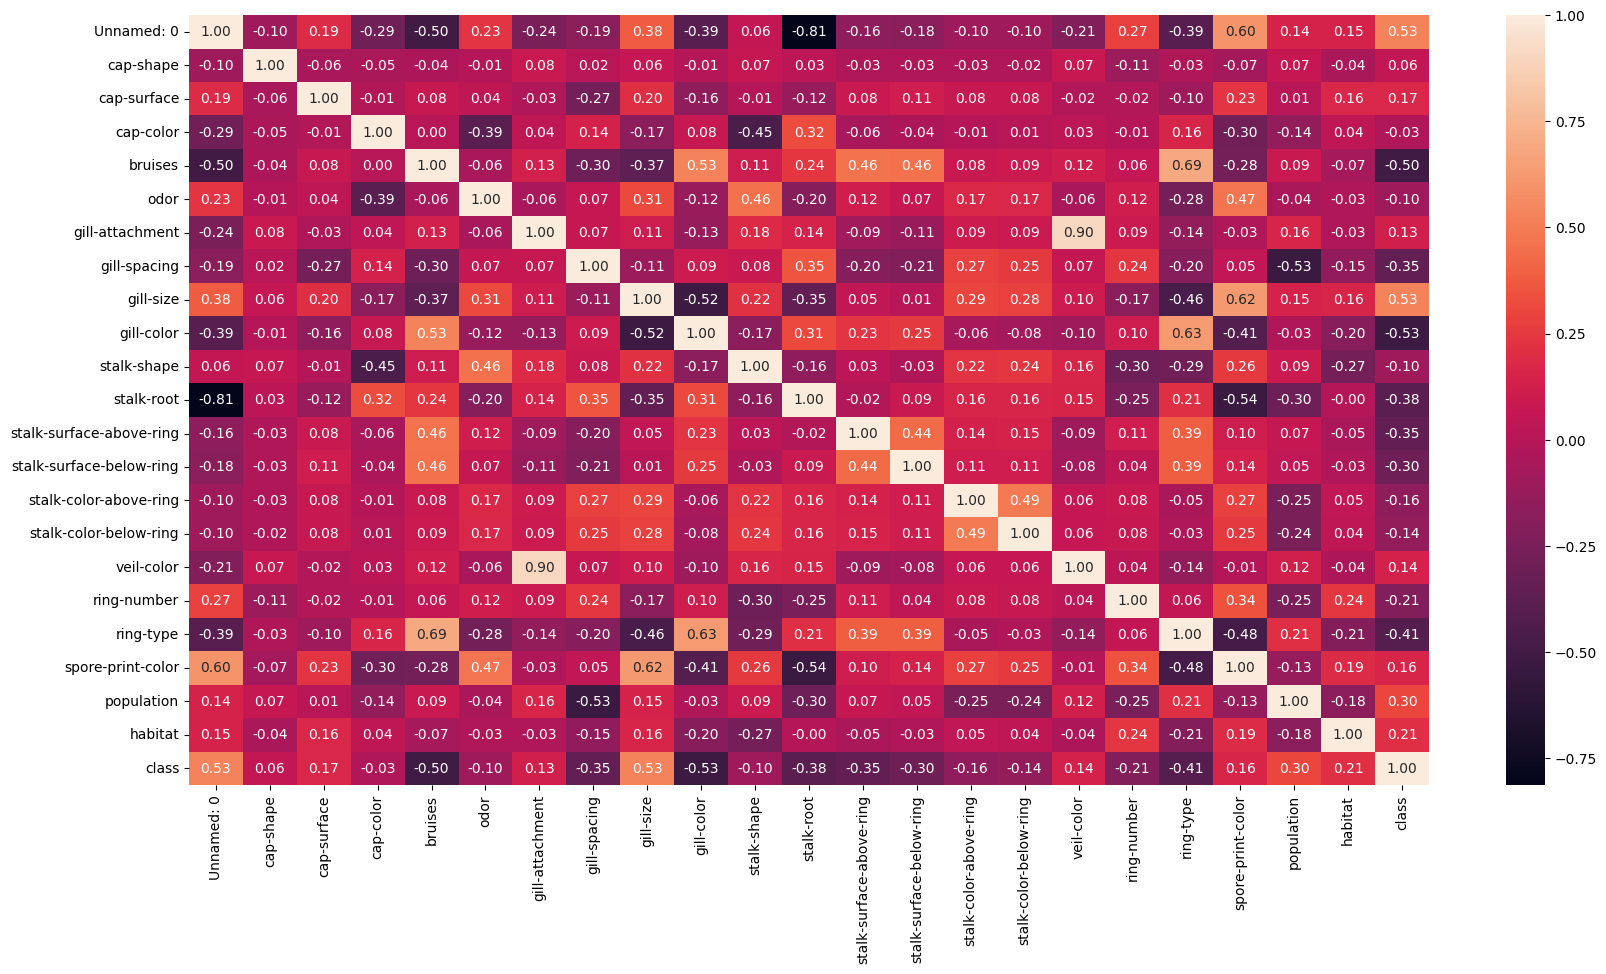

In [13]:
corr= df.corr()

fig = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot= True, fmt='.2f')



In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['df'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

vif_data

,df,VIF
0,Unnamed: 0,23.452322
1,cap-shape,5.555517
2,cap-surface,4.142449
3,cap-color,5.950060
4,bruises,12.321051
5,odor,8.948604
6,gill-attachment,293.370336
7,gill-spacing,5.090102
8,gill-size,5.779553
9,gill-color,6.492163


,gill-attachment,veil-color,ring-number
gill-attachment,1.000000,0.902001,0.088720
veil-color,0.902001,1.000000,0.036647
ring-number,0.088720,0.036647,1.000000


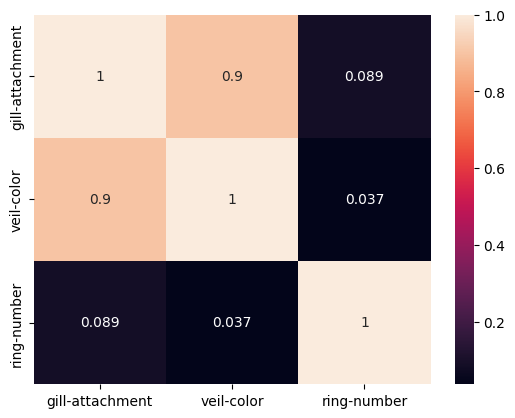

In [15]:
corr_matrix = df[['gill-attachment', 'veil-color', 'ring-number']].corr()
sns.heatmap(corr_matrix, annot=True)
corr_matrix


In [16]:
#df=df.drop(columns=['veil-color', 'Unnamed: 0'])

In [17]:
df

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5249,2,3,9,0,2,1,0,0,2,...,1,6,0,2,1,2,1,5,1,1
1,5781,5,2,5,1,5,1,0,0,1,...,2,2,7,2,2,0,7,1,6,0
2,7586,0,2,3,0,5,1,1,0,10,...,2,7,7,2,2,4,7,3,1,0
3,6181,2,2,4,0,7,1,0,1,0,...,1,6,7,2,1,0,7,4,0,1
4,7338,3,3,4,0,2,1,0,1,0,...,1,6,6,2,1,0,7,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,6150,5,2,4,0,7,1,0,1,0,...,2,6,6,2,1,0,7,4,0,1
6495,5386,5,3,4,0,5,1,1,1,10,...,0,7,4,2,1,0,7,4,2,0
6496,1357,2,0,8,0,5,1,1,0,7,...,2,7,7,2,1,0,2,0,1,0
6497,2977,5,0,3,1,5,1,0,0,10,...,2,3,6,2,1,4,3,5,0,0


## Training

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Árbol de Decisión
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Bosque Aleatorio
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

KNN Accuracy: 0.8807692307692307
Decision Tree Accuracy: 1.0
SVM Accuracy: 0.8007692307692308
Random Forest Accuracy: 1.0


In [20]:
models = [
  ("K-Nearest Neighbors", KNeighborsClassifier()),
  ("Decision Tree", DecisionTreeClassifier()),
  ("Support Vector Machine", SVC()),
  ("Random Forest", RandomForestClassifier())
]


for name, model in models:
  scores = cross_val_score(model, X, y, cv=5)  
  print(f"{name} Average Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

K-Nearest Neighbors Average Accuracy: 0.87 (+/- 0.02)
Decision Tree Average Accuracy: 1.00 (+/- 0.00)
Support Vector Machine Average Accuracy: 0.81 (+/- 0.03)
Random Forest Average Accuracy: 1.00 (+/- 0.00)


In [21]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [10, 50, 100, 200],  
    'max_depth': [None, 10, 20, 30]     
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best param: ", grid_search.best_params_)


best_model_RF = grid_search.best_estimator_
y_pred_RF = best_model_RF.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_RF))


Best param:  {'max_depth': None, 'n_estimators': 10}
Accuracy: 1.0


In [22]:
model = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'criterion': ['gini', 'entropy'],     
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best param for DecisionTree: ", grid_search.best_params_)


best_model_DT = grid_search.best_estimator_
y_pred_DT = best_model_DT.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_DT))

Best param for DecisionTree:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 1.0


## Prediction

In [24]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

test = pd.read_csv('test.csv')

test = test.drop(columns=['veil-type'])    


In [25]:
test.columns

Index(['Unnamed: 0', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [26]:
test.shape, df.shape

((1625, 22), (6499, 23))

In [27]:
columns_to_encode2 = ['Unnamed: 0', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']

for col in columns_to_encode2:
    test[col] = label_encoder.fit_transform(test[col])

In [28]:

df_test = scaler.transform(test)

#test=test.drop(columns=['veil-color', 'Unnamed: 0'])

In [29]:
y_pred = best_model_RF.predict(test)

In [30]:
test.shape, y_pred_RF.shape

((1625, 22), (1300,))

In [68]:
label_mapping = {0: 'p', 1: 'e'}


y_pred_labels = [label_mapping[label] for label in y_pred]



In [70]:
# prediciendo sobre el test set
print(y_pred_RF[0:20])
# para descargar en ordenador
def download_output(y_pred_labels, name):
  output = pd.DataFrame({'ID': range(1, len(y_pred) +1), 
                         'Edible': y_pred_labels})
  output.to_csv(name, index=False)
download_output(y_pred_labels, 'submission_labels.csv')

[0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1]
